In [119]:
import pandas as pd
import numpy as np

In [120]:
#IMPORT DATASET

# ISEAR ###############################
dataset_dir_isear = "dataset/ISEAR.csv"
df_isear = pd.read_csv(dataset_dir_isear, encoding='latin-1')

######################################

# dataset_dir = "dataset/data_train.csv"
# df = pd.read_csv(dataset_dir, encoding='latin-1')

# EMOINT ############################## 
dataset_dir_train_emoint = "dataset/EmoInt_Train.txt"
df_train_emoint = pd.read_csv(dataset_dir_train_emoint, sep="\t")

dataset_dir_test_emoint = "dataset/EmoInt_Test.txt"
df_test_emoint = pd.read_csv(dataset_dir_test_emoint, sep="\t")

dataset_dir_dev_emoint = "dataset/EmoInt_Dev.txt"
df_dev_emoint = pd.read_csv(dataset_dir_dev_emoint, sep="\t")

df_emoint = pd.concat([df_train_emoint, df_test_emoint, df_dev_emoint], ignore_index=True)

######################################

# df = df.drop_duplicates()


# df = pd.read_csv('dataset/train.txt', header =None, sep =';', names = ['Text','Emotion'], encoding='utf-8')

# df = pd.read_csv('dataset/train_2.txt', header =None, sep =';', names = ['Text','Emotion'], encoding='utf-8')

# with open('./out_train/dial.txt', encoding='utf-8') as f:
#     data = f.readlines();

# df1 = pd.DataFrame(data, columns=['Text'])

# with open('./out_train/emo.txt', encoding='utf-8') as f:
#     data = f.readlines();

# df = pd.concat([df1, pd.DataFrame(data, columns=['Emotion'])], axis=1)
# df = df.drop_duplicates()

# emotion_map = {'0\n': 'no emotion', '1\n': 'anger', '2\n': 'disgust', '3\n': 'fear', '4\n': 'happiness', '5\n': 'sadness', '6\n': 'surprise'}

# df['Emotion'] = df['Emotion'].map(emotion_map)

# df = df[df['Emotion'] != 'no emotion']

In [121]:
print(df_isear['Emotion'].value_counts())
print(df_emoint['Emotion'].value_counts())

Emotion
anger      1096
sadness    1096
disgust    1096
shame      1096
fear       1095
joy        1094
guilt      1093
Name: count, dtype: int64
Emotion
fear       2252
anger      1701
joy        1616
sadness    1533
Name: count, dtype: int64


In [122]:
#CONSTANTS
max_embedding_length = 300 #MAX EMBEDDING DIMENSION
max_sequence_length = 400 #INPUT LENGTH

In [123]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [124]:
def clean_df(df):
    # Remove username
    df['Text'] = df['Text'].apply(lambda x: re.sub('@[^\s]+', '', x))

    # Remove hashtags
    df['Text'] = df['Text'].apply(lambda x: re.sub('#[\s]+', '', x))

    # Remove numbers
    df['Text'] = df['Text'].apply(lambda x: re.sub('\d+', '', x))

    # Remove punctuations
    df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]+', '', x))

    # Convert to lowercase
    df['Text'] = df['Text'].apply(lambda x: x.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: ' '.join(
        [word for word in x.split() if word not in stop_words]))

    # Tokenize
    df['Tokenized'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

    def lemmatize(text):
        lemmatizer = WordNetLemmatizer()

        lemmatized = [lemmatizer.lemmatize(token) for token in text]
        return lemmatized

    df['Lemmatized'] = df['Tokenized'].apply(lemmatize)


    detokenizer = TreebankWordDetokenizer()

    df['Detokenized'] = df['Lemmatized'].apply(lambda x: detokenizer.detokenize(x))

    print(len(df[df['Text'].duplicated()]))

    print(df[df['Text'].duplicated()])

    df = df.drop_duplicates(subset='Text', keep="last")

    return df

In [125]:
df_emoint = clean_df(df_emoint)
df_isear = clean_df(df_isear)

264
         No                                               Text  Emotion   
535   10535  best revenge move get continue succeed never g...    anger  \
1517  20660  hello nthe bigger bully crocodile tears bullie...     fear   
1567  20710  alarm clock ringing morning n flatmate knocked...     fear   
2191  30187           watch amazing lively broadcast musically      joy   
2228  30224    watch amazing lively broadcast lively musically      joy   
...     ...                                                ...      ...   
7044  40802  would frown bit folding arms every time im nee...  sadness   
7051  40809  frustration looking elphaba frown aggravation ...  sadness   
7086  40844  yesterday finished watching penny dreadful bea...  sadness   
7099  40857  invest new film stop asking invest new film co...  sadness   
7100  40858  watched django unchained people may frown titt...  sadness   

     Intensity                                          Tokenized   
535      0.438  [best, rev

In [126]:
len(df_isear[df_isear['Text'].duplicated()])

0

In [127]:
df_isear

,Emotion,Text,Tokenized,Lemmatized,Detokenized
0,joy,period falling love time met especially met lo...,"[period, falling, love, time, met, especially,...","[period, falling, love, time, met, especially,...",period falling love time met especially met lo...
1,fear,involved traffic accident,"[involved, traffic, accident]","[involved, traffic, accident]",involved traffic accident
2,anger,driving home several days hard work motorist a...,"[driving, home, several, days, hard, work, mot...","[driving, home, several, day, hard, work, moto...",driving home several day hard work motorist ah...
3,sadness,lost person meant,"[lost, person, meant]","[lost, person, meant]",lost person meant
4,disgust,time knocked deer sight animals injuries helpl...,"[time, knocked, deer, sight, animals, injuries...","[time, knocked, deer, sight, animal, injury, h...",time knocked deer sight animal injury helpless...
...,...,...,...,...,...
7661,anger,two years back someone invited tutor granddaug...,"[two, years, back, someone, invited, tutor, gr...","[two, year, back, someone, invited, tutor, gra...",two year back someone invited tutor granddaugh...
7662,sadness,taken responsibility something prepared howeve...,"[taken, responsibility, something, prepared, h...","[taken, responsibility, something, prepared, h...",taken responsibility something prepared howeve...
7663,disgust,home heard loud sound spitting outside door th...,"[home, heard, loud, sound, spitting, outside, ...","[home, heard, loud, sound, spitting, outside, ...",home heard loud sound spitting outside door th...
7664,shame,homework teacher asked us scolded immediately,"[homework, teacher, asked, us, scolded, immedi...","[homework, teacher, asked, u, scolded, immedia...",homework teacher asked u scolded immediately


In [128]:
df_emoint

,No,Text,Emotion,Intensity,Tokenized,Lemmatized,Detokenized
0,10000,fuk heck moved fridge knock landlord door angr...,anger,0.938,"[fuk, heck, moved, fridge, knock, landlord, do...","[fuk, heck, moved, fridge, knock, landlord, do...",fuk heck moved fridge knock landlord door angr...
1,10001,indian uber driver called someone n word wasnt...,anger,0.896,"[indian, uber, driver, called, someone, n, wor...","[indian, uber, driver, called, someone, n, wor...",indian uber driver called someone n word wasnt...
2,10002,asked parcel delivered pick store address fumi...,anger,0.896,"[asked, parcel, delivered, pick, store, addres...","[asked, parcel, delivered, pick, store, addres...",asked parcel delivered pick store address fumi...
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,"[ef, whichever, butt, wipe, pulled, fire, alar...","[ef, whichever, butt, wipe, pulled, fire, alar...",ef whichever butt wipe pulled fire alarm davis...
4,10004,dont join put phone talk rude taking money acc...,anger,0.896,"[dont, join, put, phone, talk, rude, taking, m...","[dont, join, put, phone, talk, rude, taking, m...",dont join put phone talk rude taking money acc...
...,...,...,...,...,...,...,...
7097,40855,common app randomly logged writing last part c...,sadness,NONE,"[common, app, randomly, logged, writing, last,...","[common, app, randomly, logged, writing, last,...",common app randomly logged writing last part c...
7098,40856,id rather laugh rarest genius beautiful allian...,sadness,NONE,"[id, rather, laugh, rarest, genius, beautiful,...","[id, rather, laugh, rarest, genius, beautiful,...",id rather laugh rarest genius beautiful allian...
7099,40857,invest new film stop asking invest new film co...,sadness,NONE,"[invest, new, film, stop, asking, invest, new,...","[invest, new, film, stop, asking, invest, new,...",invest new film stop asking invest new film co...
7100,40858,watched django unchained people may frown titt...,sadness,NONE,"[watched, django, unchained, people, may, frow...","[watched, django, unchained, people, may, frow...",watched django unchained people may frown titt...


In [129]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [130]:
def convert_categorical(df):
    le = LabelEncoder()
    y = le.fit_transform(df['Emotion'])
    return to_categorical(y)

In [131]:
y_emoint = convert_categorical(df_emoint)
y_isear = convert_categorical(df_isear)

In [132]:
print(y_emoint)
print(y_isear)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
def split_dataset(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

    return X_train, X_test, X_val, y_train, y_test, y_val

X_train_isear, X_test_isear, X_val_isear, y_train_isear, y_test_isear, y_val_isear = split_dataset(df_isear['Detokenized'], y_isear);
X_train_emoint, X_test_emoint, X_val_emoint, y_train_emoint, y_test_emoint, y_val_emoint = split_dataset(df_emoint['Detokenized'], y_emoint);

In [135]:
print("ISEAR: ")
print(len(X_train_isear))
print(len(X_test_isear))
print(len(X_val_isear))

print("EmoInt: ")
print(len(X_train_emoint))
print(len(X_test_emoint))
print(len(X_val_emoint))

ISEAR: 
5218
1118
1119
EmoInt: 
4786
1026
1026


In [136]:
def concatenate_text(data):
    return [''.join(text) for text in data]

#ISEAR
text_arr_isear = concatenate_text(df_isear['Detokenized'])
text_train_arr_isear = concatenate_text(X_train_isear)
text_test_arr_isear = concatenate_text(X_test_isear)
text_val_arr_isear = concatenate_text(X_val_isear)

#EMOINT
text_arr_emoint = concatenate_text(df_emoint['Detokenized'])
text_train_arr_emoint = concatenate_text(X_train_emoint)
text_test_arr_emoint = concatenate_text(X_test_emoint)
text_val_arr_emoint = concatenate_text(X_val_emoint)

In [137]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [138]:
def try_pad_sequence(text_arr, tokenizer):
    sequences = tokenizer.texts_to_sequences(text_arr)
    padded_sequence = pad_sequences(sequences, maxlen = max_sequence_length )
    return padded_sequence

In [139]:
#ISEAR

tokenizer_isear = Tokenizer()
tokenizer_isear.fit_on_texts(text_arr_isear)

X_train_padded_isear = try_pad_sequence(text_train_arr_isear, tokenizer_isear)
X_test_padded_isear = try_pad_sequence(text_test_arr_isear, tokenizer_isear)
X_val_padded_isear = try_pad_sequence(text_val_arr_isear, tokenizer_isear)

#EMOINT

tokenizer_emoint = Tokenizer()
tokenizer_emoint.fit_on_texts(text_arr_emoint)

X_train_padded_emoint = try_pad_sequence(text_train_arr_emoint, tokenizer_emoint)
X_test_padded_emoint = try_pad_sequence(text_test_arr_emoint, tokenizer_emoint)
X_val_padded_emoint = try_pad_sequence(text_val_arr_emoint, tokenizer_emoint)

In [140]:
from gensim.models import KeyedVectors

In [141]:
#EMBEDDING MATRIX CREATION -> CHOOSE ONE

#1ST CHOICE -> USING GLOVE OR FASTTEXT -> JUST CHANGE THE FILEPATH # wiki-news-300d-1M.vec # glove.6B.300d.txt
embeddings_glove = {}
with open('embedding/glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        token = line.split()[0]
        embeddings_glove[token] = np.array(line.split()[1:], dtype='float32')

embeddings_fasttext = {}
with open('embedding/wiki-news-300d-1M.vec', encoding='utf-8') as f:
    for line in f:
        token = line.split()[0]
        embeddings_fasttext[token] = np.array(line.split()[1:], dtype='float32')

#2ND CHOICE -> USING WORD2VEC
embeddings_word2vec = KeyedVectors.load_word2vec_format('embedding/GoogleNews-vectors-negative300.bin', binary=True)

In [142]:
def create_embedding_matrix(embeddings, tokenizer):
    embedding_matrix = np.zeros((len(tokenizer.word_index)+1, max_embedding_length))

    for word, i in tokenizer.word_index.items():
        if i < len(tokenizer.word_index) + 1 and word in embeddings:
            embedding_matrix[i] = embeddings[word]
    return embedding_matrix

In [143]:
embedding_matrix_glove_isear = create_embedding_matrix(embeddings_glove, tokenizer_isear);
embedding_matrix_fasttext_isear = create_embedding_matrix(embeddings_fasttext, tokenizer_isear);
embedding_matrix_word2vec_isear = create_embedding_matrix(embeddings_word2vec, tokenizer_isear);

embedding_matrix_glove_emoint = create_embedding_matrix(embeddings_glove, tokenizer_emoint);
embedding_matrix_fasttext_emoint = create_embedding_matrix(embeddings_fasttext, tokenizer_emoint);
embedding_matrix_word2vec_emoint = create_embedding_matrix(embeddings_word2vec, tokenizer_emoint);

print(embedding_matrix_glove_isear)
print(embedding_matrix_fasttext_isear)
print(embedding_matrix_word2vec_isear)

print(embedding_matrix_glove_emoint)
print(embedding_matrix_fasttext_emoint)
print(embedding_matrix_word2vec_emoint)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.34630999  0.049874   -0.27123001 ...  0.39772999 -0.67561001
   0.65579998]
 [ 0.15001     0.042766   -0.21786    ...  0.24023999 -0.10619
  -0.11801   ]
 ...
 [-0.077003    0.015782    0.077408   ...  0.19261     0.27535999
  -0.14505   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.41993001  0.56505001 -0.33243999 ...  0.058574    0.034328
  -0.055211  ]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.0789     -0.0313      0.1218     ...  0.0654      0.003
  -0.1005    ]
 [ 0.0758     -0.0695     -0.0053     ...  0.14920001 -0.1192
  -0.1248    ]
 ...
 [ 0.0644     -0.0409     -0.20460001 ...  0.1965     -0.0314
  -0.1149    ]
 [ 0.0602     -0.0569     -0.008      ...  0.0913     -0.0573
   0.0449    ]
 [ 0.0823     -0.0895     -0.1812     ...  0.0267     -0.0671
  -0.0929    ]]
[[ 0.          0.          0.         ...  0.          0.
   0.   

In [144]:
model_config = {
    "Embedding": {
        "ISEAR": {
        "Word2Vec": embedding_matrix_word2vec_isear,
        "Glove": embedding_matrix_glove_isear,
        "FastText": embedding_matrix_fasttext_isear
        },
        "EmoInt": {
            "Word2Vec": embedding_matrix_word2vec_emoint,
            "Glove": embedding_matrix_glove_emoint,
            "FastText": embedding_matrix_fasttext_emoint
        },
    },
    "Tokenizer": {
        "ISEAR": tokenizer_isear,
        "EmoInt": tokenizer_emoint,
    },
    "Classes": {
        "ISEAR": 7,
        "EmoInt": 4,
    },
    "Data": {
        "ISEAR": {
            "X_train": X_train_padded_isear,
            "y_train": y_train_isear,
            "X_test": X_test_padded_isear,
            "y_test": y_test_isear,
            "X_val": X_val_padded_isear,
            "y_val": y_val_isear,
        },
        "EmoInt": {
            "X_train": X_train_padded_emoint,
            "y_train": y_train_emoint,
            "X_test": X_test_padded_emoint,
            "y_test": y_test_emoint,
            "X_val": X_val_padded_emoint,
            "y_val": y_val_emoint,
        }
    }
}

In [145]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GRU, Conv1D, GlobalMaxPool1D, Flatten
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
import os

In [146]:
def test_model(type="LSTM", embedding="Word2Vec", dataset="ISEAR"):
    model = Sequential()

    embedding_matrix = model_config["Embedding"][dataset][embedding]
    tokenizer = model_config["Tokenizer"][dataset]

    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                        output_dim=max_embedding_length, 
                        input_length = max_sequence_length, 
                        weights = [embedding_matrix], 
                        trainable=False))
        
    if (type == "LSTM"):
        model.add(LSTM(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True))
    elif (type == "BiLSTM"):
        model.add(Bidirectional(LSTM(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True)))
    elif (type == "GRU"):
        model.add(GRU(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True))
    else:
        model.add(Bidirectional(GRU(128, kernel_regularizer=regularizers.l2(0.02), return_sequences=True)))
    
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))

    model.add(Dense(model_config["Classes"][dataset], activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)

    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    model.summary()


    X_train = model_config["Data"][dataset]["X_train"]
    X_test = model_config["Data"][dataset]["X_test"]
    X_val = model_config["Data"][dataset]["X_val"]

    y_train = model_config["Data"][dataset]["y_train"]
    y_test = model_config["Data"][dataset]["y_test"]
    y_val = model_config["Data"][dataset]["y_val"]
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size= 64)

    output_dir = os.path.join('./output', type)

    #Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(dataset + ' ' + type + ' + ' + embedding + ' Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    loss_filename = f"{dataset}_{type}_{embedding}_Model_Loss.png"
    loss_path = os.path.join(output_dir, loss_filename)

    plt.savefig(loss_path)

    plt.show()

    #Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(dataset + ' ' + type + ' + ' + embedding + ' Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper right')

    accuracy_filename = f"{dataset}_{type}_{embedding}_Model_Accuracy.png"
    accuracy_path = os.path.join(output_dir, accuracy_filename)

    plt.savefig(accuracy_path)

    plt.show()

    prediction_results = model.predict(X_test)
    prediction_results = np.argmax(prediction_results, axis=1)
    y_test_result = np.argmax(y_test, axis=1)
    loss, accuracy = model.evaluate(X_test, y_test)

    #print(loss, accuracy)

    test_accuracy = accuracy_score(y_test_result, prediction_results)
    test_recall = recall_score(y_test_result, prediction_results, average='weighted')
    test_precision = precision_score(y_test_result, prediction_results, average='weighted')
    test_f1 = f1_score(y_test_result, prediction_results, average='weighted')

    print(f"Accuracy: {test_accuracy:.3f}%")
    print(f"Recall Score: {test_recall:.3f}")
    print(f"Precision: {test_precision:.3f}")
    print(f"F1 Score: {test_f1:.3f}")

    
    results = {
        'Accuracy': test_accuracy,
        'Recall': test_recall,
        'Precision': test_precision,
        'F1 Score': test_f1
    }

    return results

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_56 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 lstm_36 (LSTM)              (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_56 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_56 (Dropout)        (None, 128)               0         
                                                                 
 dense_56 (Dense)            (None, 7)                 903       
                                                                 
Total params: 2,702,451
Trainable params: 220,551
Non-trainable params: 2,481,900
_____________________________________

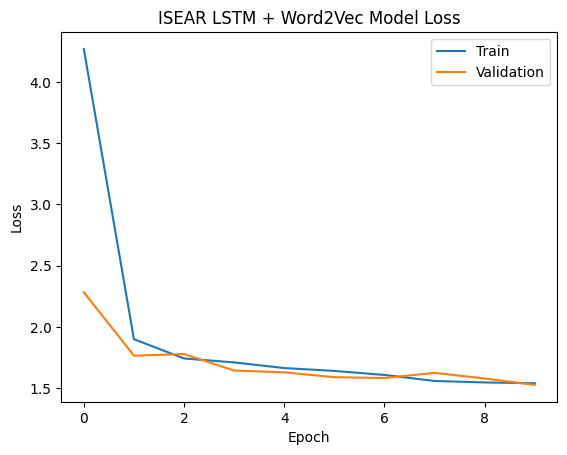

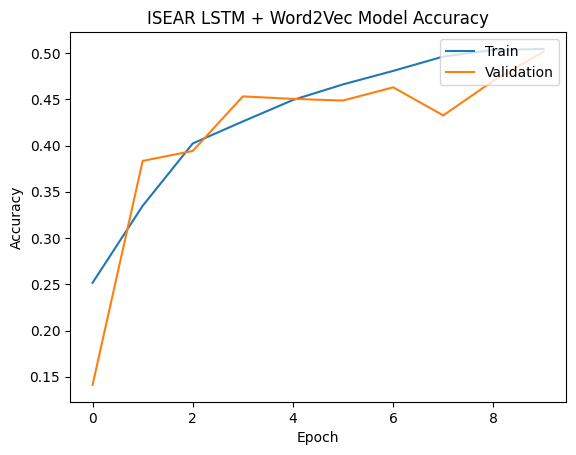

35/35 [==============================] - 0s 12ms/step - loss: 1.5187 - accuracy: 0.5215
Accuracy: 0.521%
Recall Score: 0.521
Precision: 0.515
F1 Score: 0.515
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_57 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 lstm_37 (LSTM)              (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_57 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_57 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 7)                 903       
                           

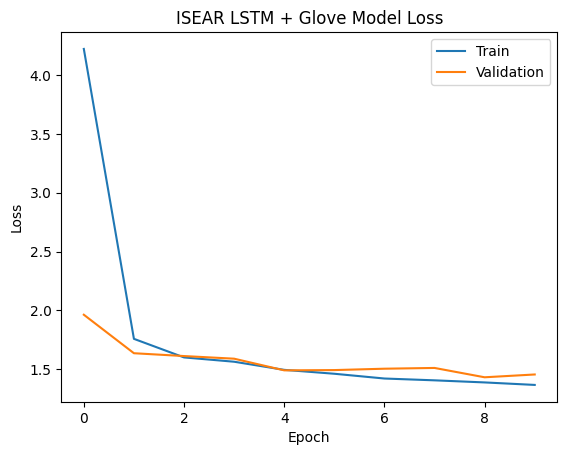

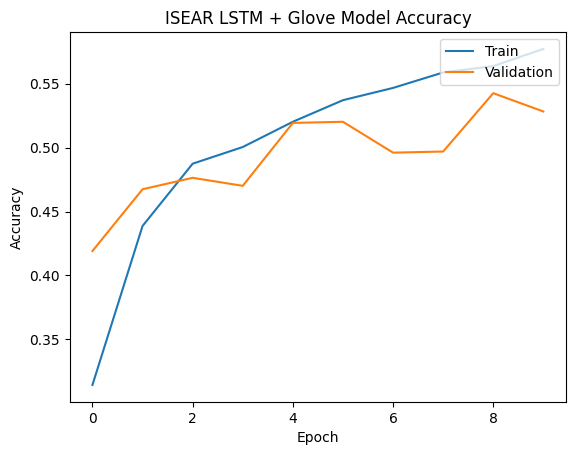

35/35 [==============================] - 1s 14ms/step - loss: 1.4529 - accuracy: 0.5349
Accuracy: 0.535%
Recall Score: 0.535
Precision: 0.532
F1 Score: 0.520
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_58 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 lstm_38 (LSTM)              (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_58 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_58 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 7)                 903       
                           

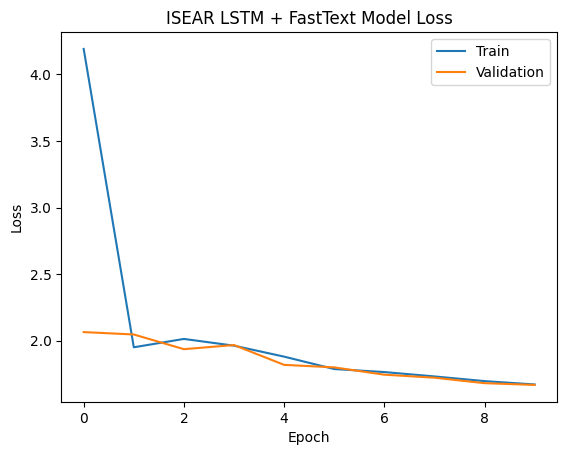

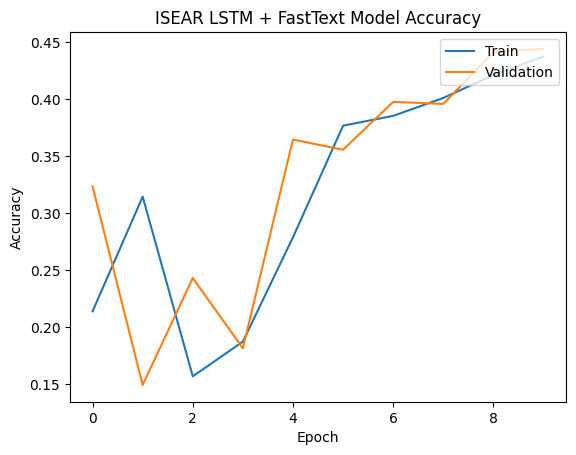

35/35 [==============================] - 1s 14ms/step - loss: 1.6242 - accuracy: 0.4705
Accuracy: 0.470%
Recall Score: 0.470
Precision: 0.466
F1 Score: 0.459
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_59 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 lstm_39 (LSTM)              (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_59 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_59 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 516       
                           

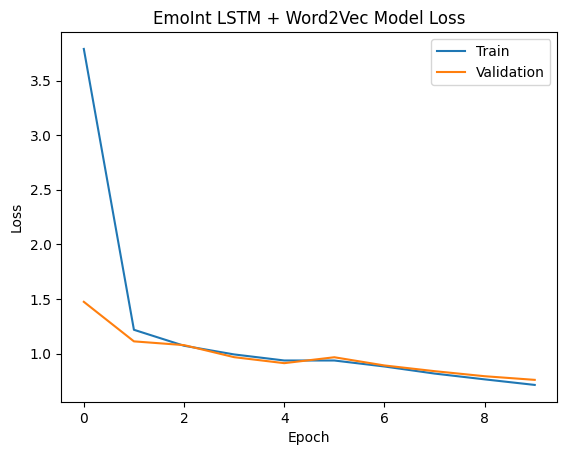

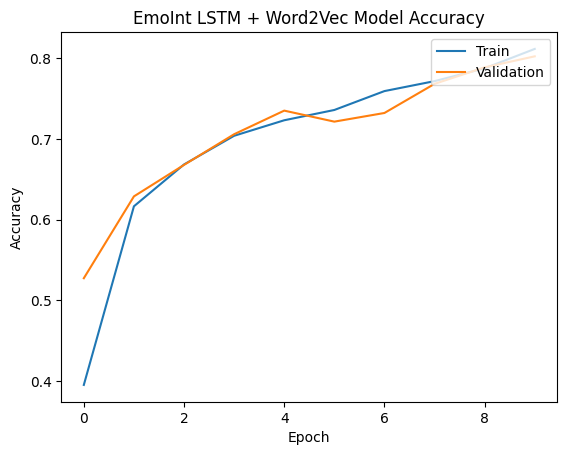

33/33 [==============================] - 0s 13ms/step - loss: 0.7675 - accuracy: 0.8060
Accuracy: 0.806%
Recall Score: 0.806
Precision: 0.814
F1 Score: 0.807
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_60 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 lstm_40 (LSTM)              (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_60 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_60 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 4)                 516       
                           

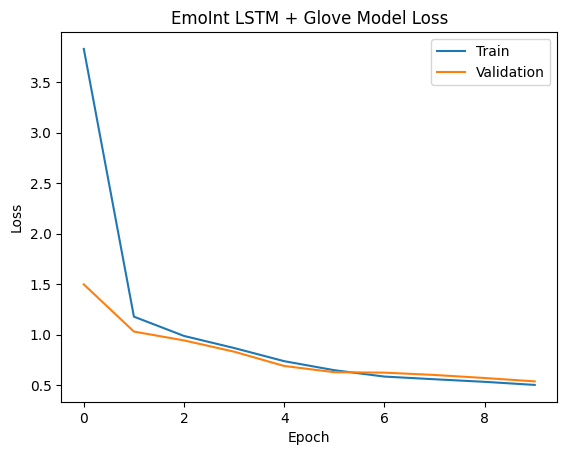

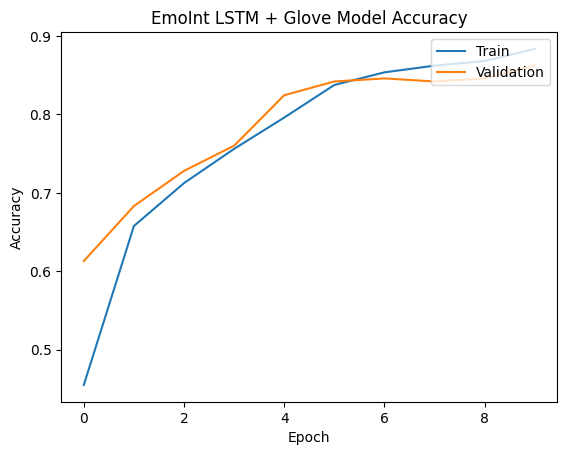

33/33 [==============================] - 0s 12ms/step - loss: 0.5457 - accuracy: 0.8791
Accuracy: 0.879%
Recall Score: 0.879
Precision: 0.880
F1 Score: 0.879
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_61 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 lstm_41 (LSTM)              (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d_61 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 dense_61 (Dense)            (None, 4)                 516       
                           

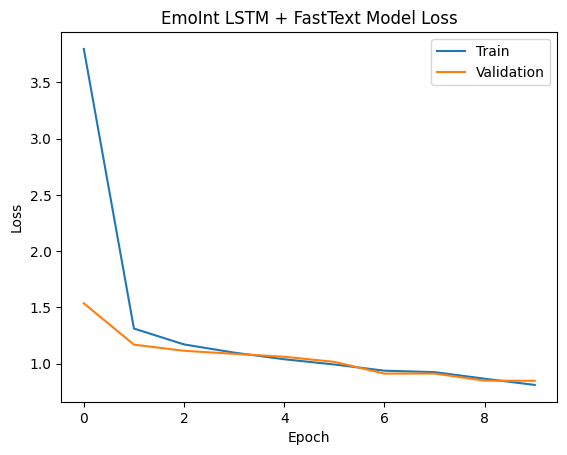

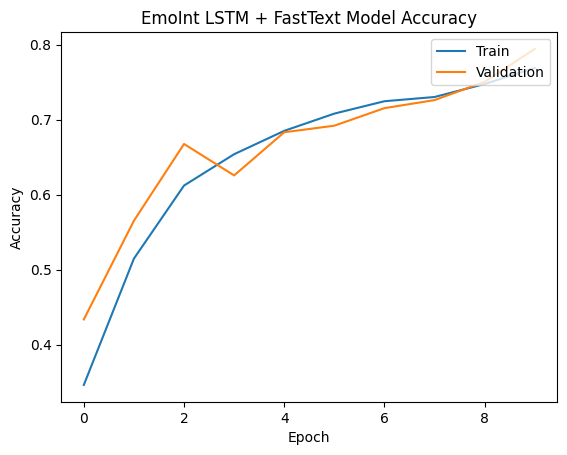

33/33 [==============================] - 0s 13ms/step - loss: 0.8527 - accuracy: 0.7729
Accuracy: 0.773%
Recall Score: 0.773
Precision: 0.774
F1 Score: 0.773


In [147]:
res_isear_lstm_word2vec = test_model("LSTM", "Word2Vec", "ISEAR")
res_isear_lstm_glove = test_model("LSTM", "Glove", "ISEAR")
res_isear_lstm_fasttext = test_model("LSTM", "FastText", "ISEAR")

res_emoint_lstm_word2vec = test_model("LSTM", "Word2Vec", "EmoInt")
res_emoint_lstm_glove = test_model("LSTM", "Glove", "EmoInt")
res_emoint_lstm_fasttext = test_model("LSTM", "FastText", "EmoInt")

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_62 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 bidirectional_25 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_62 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_62 (Dropout)        (None, 256)               0         
                                                                 
 dense_62 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 2,922,995
Trainable params: 441,095
Non

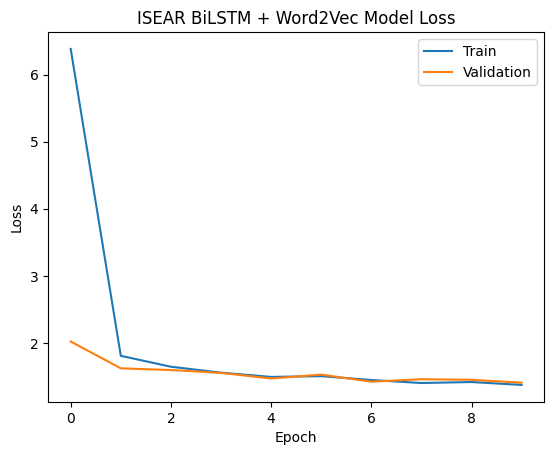

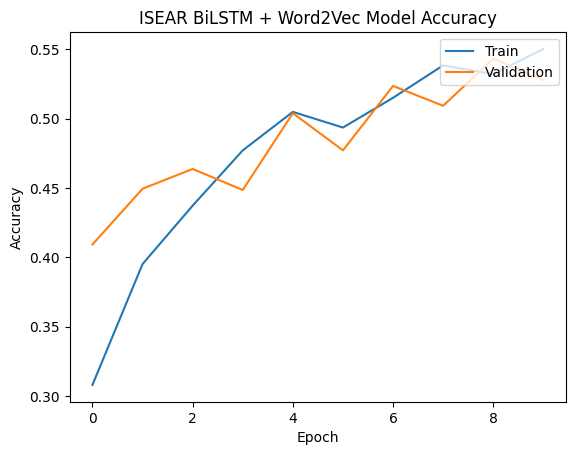

35/35 [==============================] - 1s 25ms/step - loss: 1.4109 - accuracy: 0.5242
Accuracy: 0.524%
Recall Score: 0.524
Precision: 0.601
F1 Score: 0.509
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_63 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 bidirectional_26 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_63 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_63 (Dropout)        (None, 256)               0         
                                                                 
 dense_63 (Dense)          

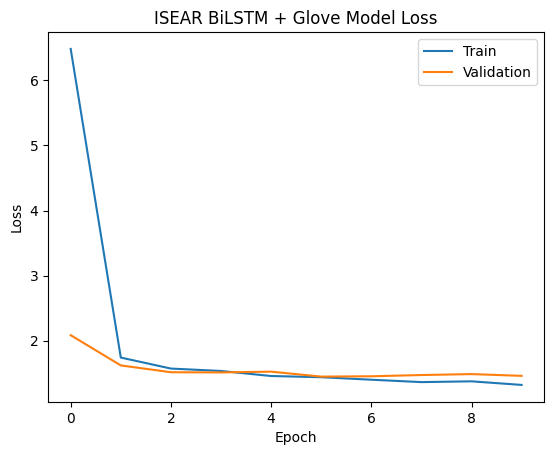

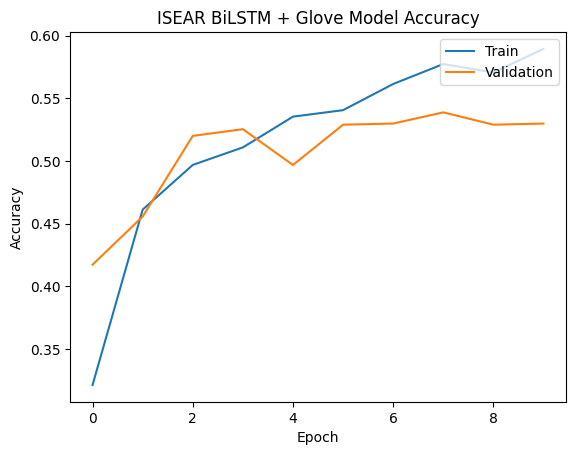

35/35 [==============================] - 1s 24ms/step - loss: 1.4158 - accuracy: 0.5546
Accuracy: 0.555%
Recall Score: 0.555
Precision: 0.561
F1 Score: 0.551
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_64 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 bidirectional_27 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_64 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_64 (Dropout)        (None, 256)               0         
                                                                 
 dense_64 (Dense)          

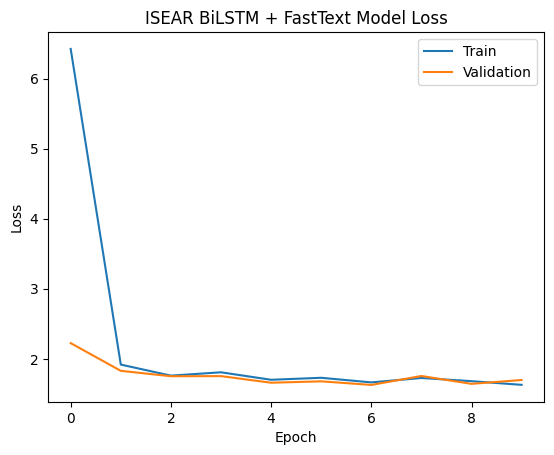

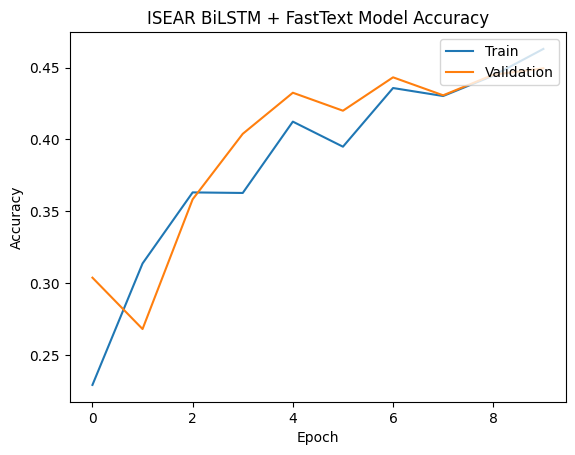

35/35 [==============================] - 1s 24ms/step - loss: 1.6664 - accuracy: 0.4705
Accuracy: 0.470%
Recall Score: 0.470
Precision: 0.520
F1 Score: 0.466
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_65 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_28 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_65 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_65 (Dropout)        (None, 256)               0         
                                                                 
 dense_65 (Dense)          

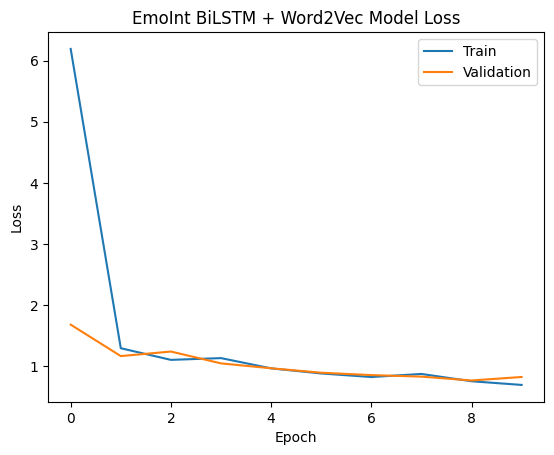

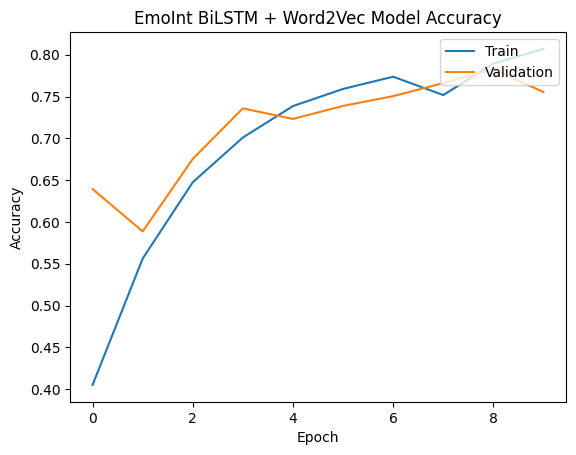

33/33 [==============================] - 1s 25ms/step - loss: 0.8072 - accuracy: 0.7515
Accuracy: 0.751%
Recall Score: 0.751
Precision: 0.780
F1 Score: 0.751
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_66 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_29 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_66 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_66 (Dropout)        (None, 256)               0         
                                                                 
 dense_66 (Dense)          

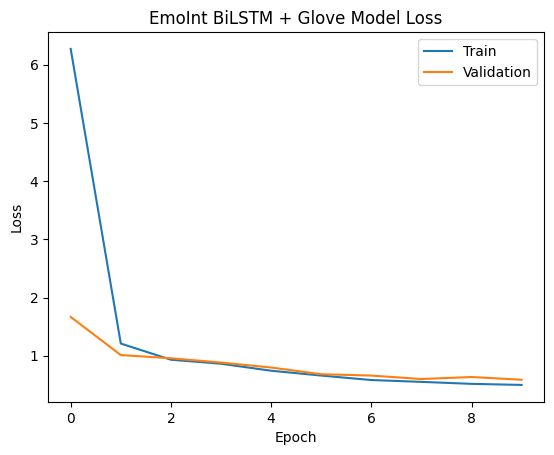

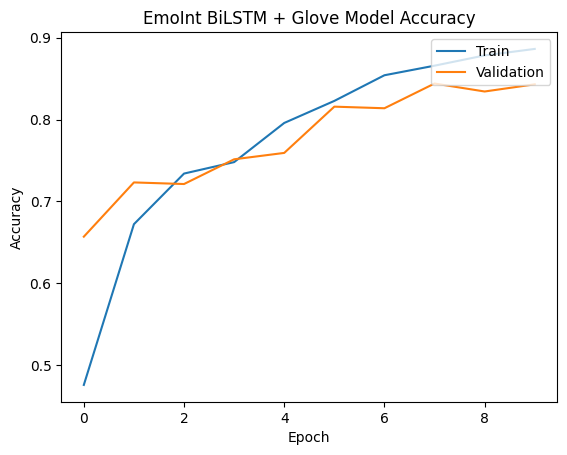

33/33 [==============================] - 1s 24ms/step - loss: 0.5719 - accuracy: 0.8538
Accuracy: 0.854%
Recall Score: 0.854
Precision: 0.858
F1 Score: 0.854
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_67 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_30 (Bidirecti  (None, 400, 256)         439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_67 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_67 (Dropout)        (None, 256)               0         
                                                                 
 dense_67 (Dense)          

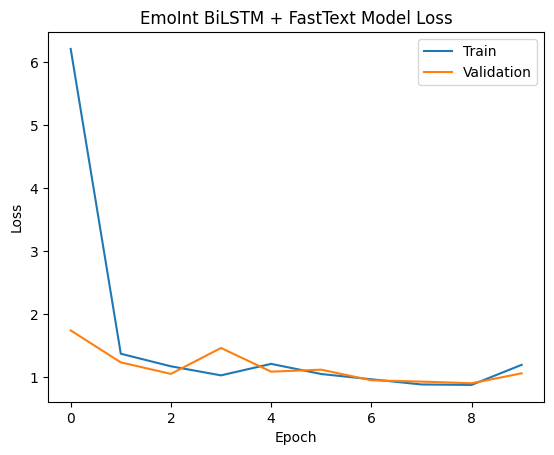

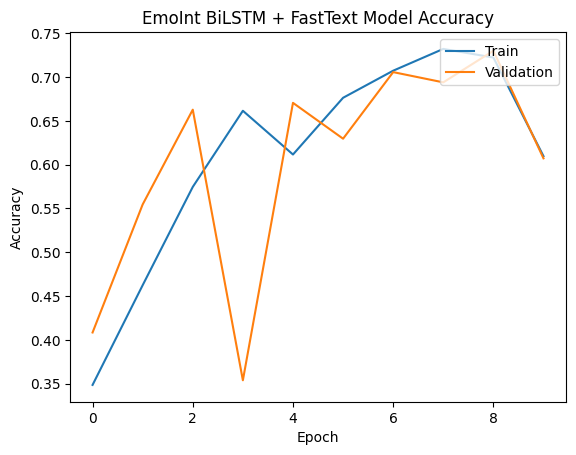

33/33 [==============================] - 1s 30ms/step - loss: 1.0055 - accuracy: 0.6384
Accuracy: 0.638%
Recall Score: 0.638
Precision: 0.699
F1 Score: 0.647


In [148]:
res_isear_bilstm_word2vec = test_model("BiLSTM", "Word2Vec", "ISEAR")
res_isear_bilstm_glove = test_model("BiLSTM", "Glove", "ISEAR")
res_isear_bilstm_fasttext = test_model("BiLSTM", "FastText", "ISEAR")

res_emoint_bilstm_word2vec = test_model("BiLSTM", "Word2Vec", "EmoInt")
res_emoint_bilstm_glove = test_model("BiLSTM", "Glove", "EmoInt")
res_emoint_bilstm_fasttext = test_model("BiLSTM", "FastText", "EmoInt")

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_68 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 gru_20 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_68 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_68 (Dropout)        (None, 128)               0         
                                                                 
 dense_68 (Dense)            (None, 7)                 903       
                                                                 
Total params: 2,647,923
Trainable params: 166,023
Non-trainable params: 2,481,900
_____________________________________

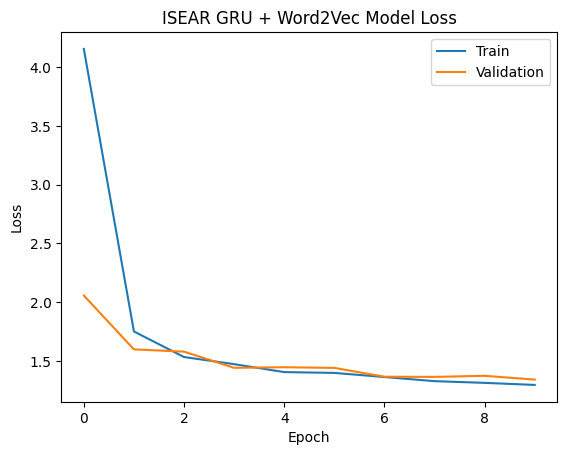

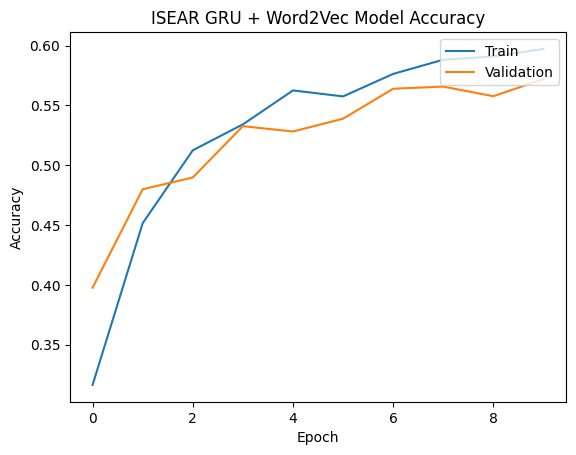

35/35 [==============================] - 0s 10ms/step - loss: 1.3528 - accuracy: 0.5644
Accuracy: 0.564%
Recall Score: 0.564
Precision: 0.583
F1 Score: 0.555
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_69 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 gru_21 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_69 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 7)                 903       
                           

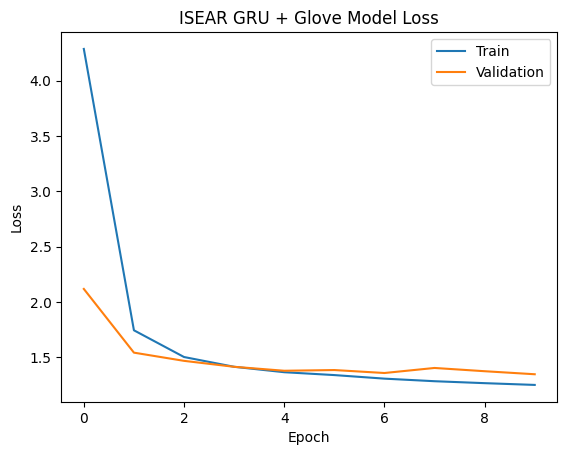

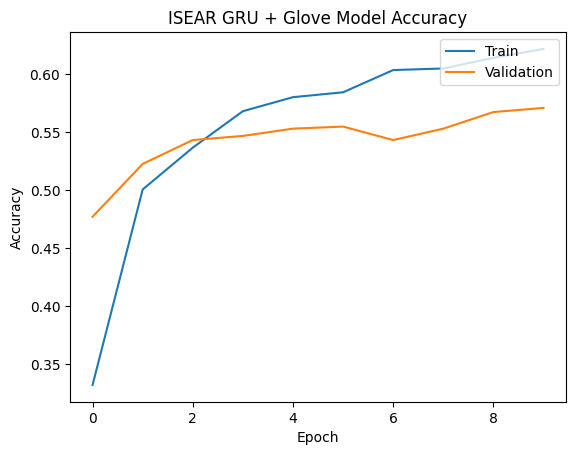

35/35 [==============================] - 0s 10ms/step - loss: 1.3684 - accuracy: 0.5769
Accuracy: 0.577%
Recall Score: 0.577
Precision: 0.588
F1 Score: 0.566
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_70 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 gru_22 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_70 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_70 (Dropout)        (None, 128)               0         
                                                                 
 dense_70 (Dense)            (None, 7)                 903       
                           

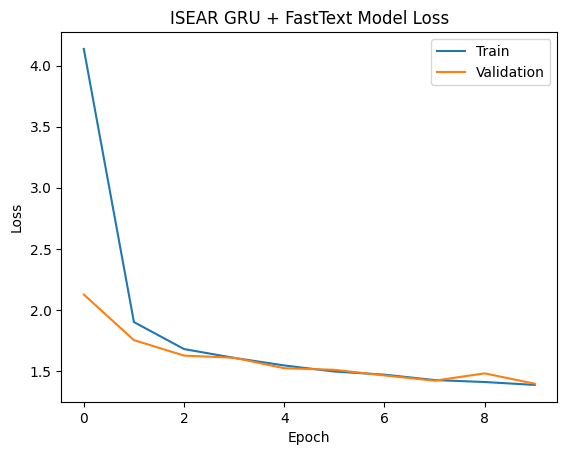

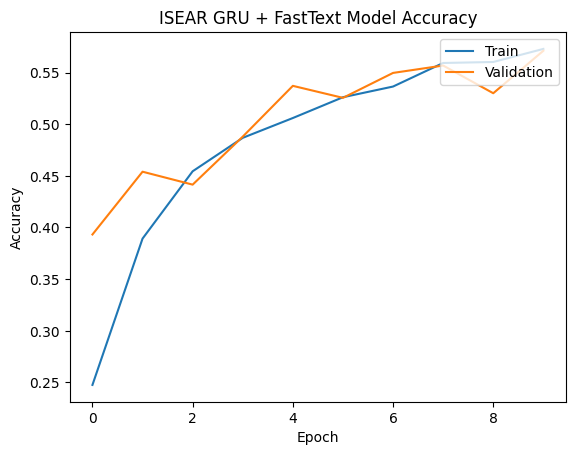

35/35 [==============================] - 0s 10ms/step - loss: 1.3778 - accuracy: 0.5662
Accuracy: 0.566%
Recall Score: 0.566
Precision: 0.567
F1 Score: 0.555
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_71 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 gru_23 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_71 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_71 (Dropout)        (None, 128)               0         
                                                                 
 dense_71 (Dense)            (None, 4)                 516       
                           

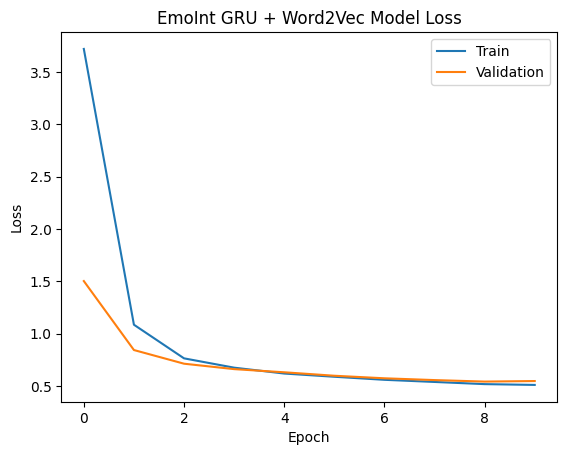

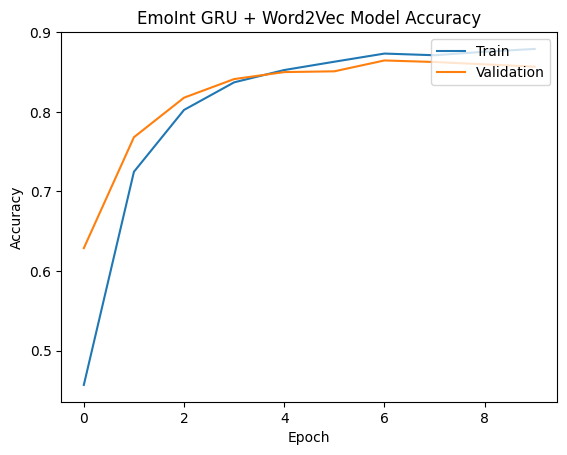

33/33 [==============================] - 1s 15ms/step - loss: 0.5440 - accuracy: 0.8665
Accuracy: 0.866%
Recall Score: 0.866
Precision: 0.871
F1 Score: 0.867
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_72 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 gru_24 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_72 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_72 (Dropout)        (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 4)                 516       
                           

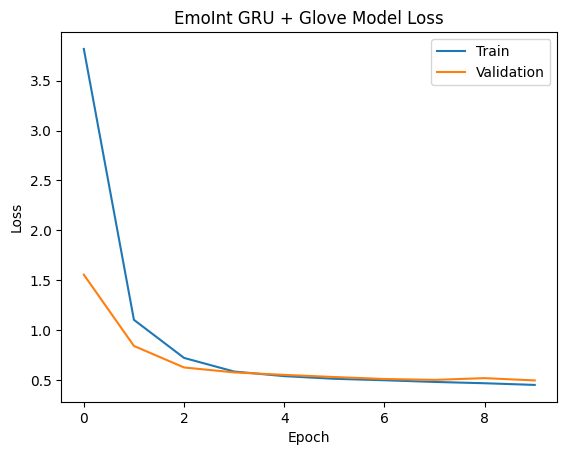

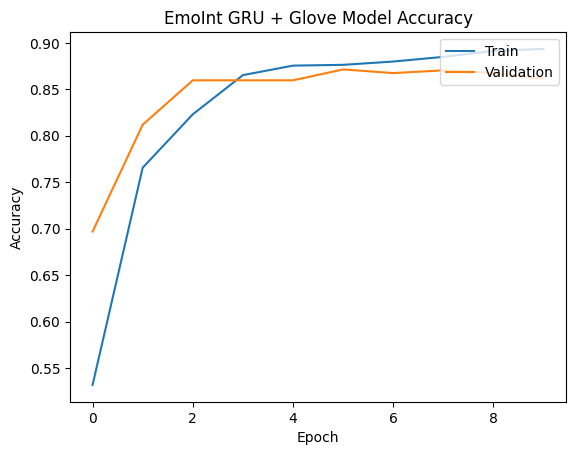

33/33 [==============================] - 0s 12ms/step - loss: 0.4943 - accuracy: 0.8879
Accuracy: 0.888%
Recall Score: 0.888
Precision: 0.892
F1 Score: 0.889
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_73 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 gru_25 (GRU)                (None, 400, 128)          165120    
                                                                 
 global_max_pooling1d_73 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_73 (Dropout)        (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 4)                 516       
                           

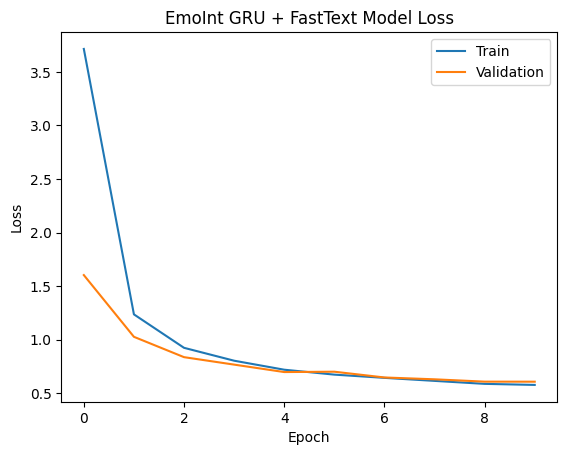

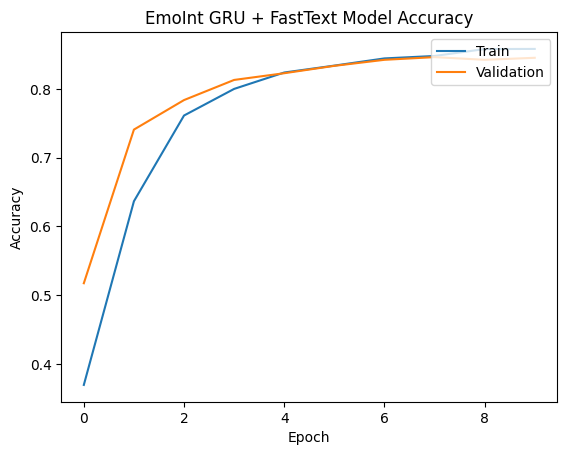

33/33 [==============================] - 0s 10ms/step - loss: 0.5857 - accuracy: 0.8635
Accuracy: 0.864%
Recall Score: 0.864
Precision: 0.872
F1 Score: 0.864


In [149]:
res_isear_gru_word2vec = test_model("GRU", "Word2Vec", "ISEAR")
res_isear_gru_glove = test_model("GRU", "Glove", "ISEAR")
res_isear_gru_fasttext = test_model("GRU", "FastText", "ISEAR")

res_emoint_gru_word2vec = test_model("GRU", "Word2Vec", "EmoInt")
res_emoint_gru_glove = test_model("GRU", "Glove", "EmoInt")
res_emoint_gru_fasttext = test_model("GRU", "FastText", "EmoInt")

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_74 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 bidirectional_31 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_74 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_74 (Dropout)        (None, 256)               0         
                                                                 
 dense_74 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 2,813,939
Trainable params: 332,039
Non

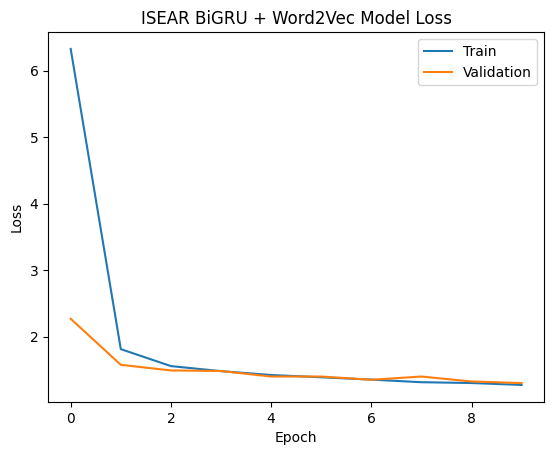

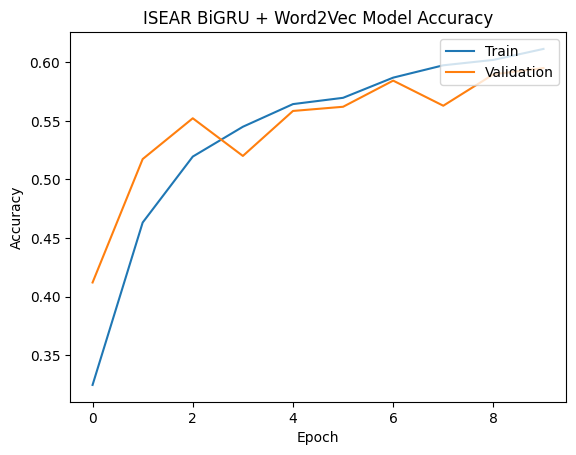

35/35 [==============================] - 1s 19ms/step - loss: 1.3305 - accuracy: 0.5903
Accuracy: 0.590%
Recall Score: 0.590
Precision: 0.608
F1 Score: 0.585
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_75 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 bidirectional_32 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_75 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_75 (Dropout)        (None, 256)               0         
                                                                 
 dense_75 (Dense)          

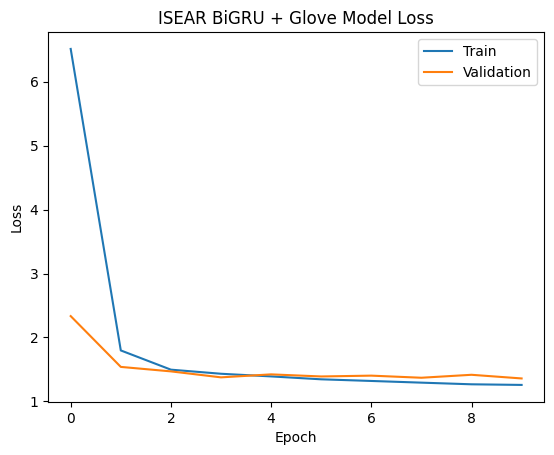

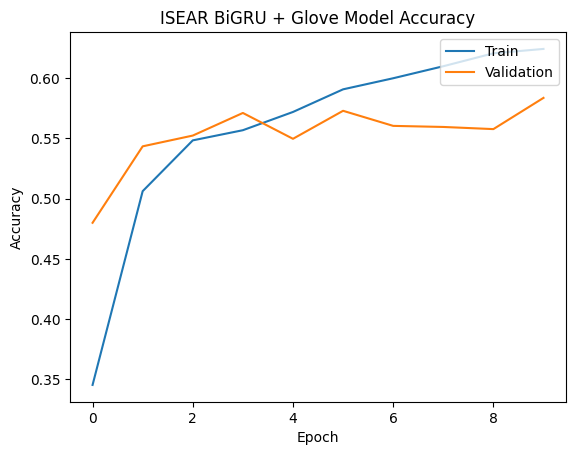

35/35 [==============================] - 1s 20ms/step - loss: 1.3560 - accuracy: 0.5707
Accuracy: 0.571%
Recall Score: 0.571
Precision: 0.570
F1 Score: 0.562
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_76 (Embedding)    (None, 400, 300)          2481900   
                                                                 
 bidirectional_33 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_76 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_76 (Dropout)        (None, 256)               0         
                                                                 
 dense_76 (Dense)          

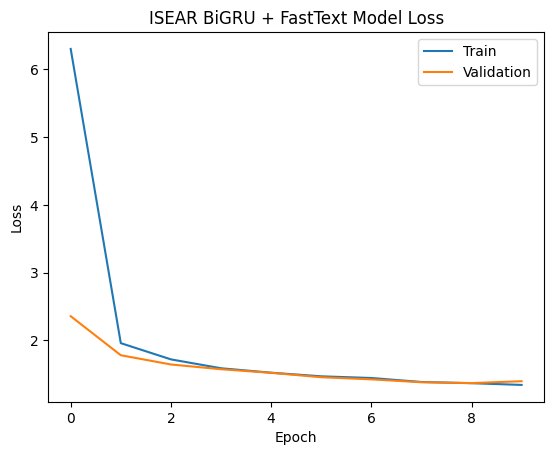

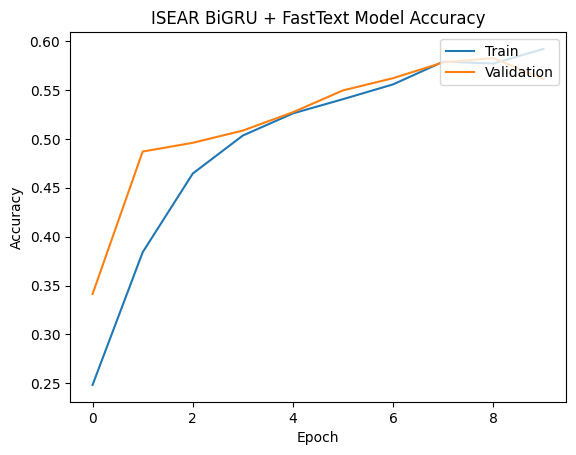

35/35 [==============================] - 1s 18ms/step - loss: 1.3529 - accuracy: 0.5805
Accuracy: 0.581%
Recall Score: 0.581
Precision: 0.623
F1 Score: 0.569
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_77 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_34 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_77 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_77 (Dropout)        (None, 256)               0         
                                                                 
 dense_77 (Dense)          

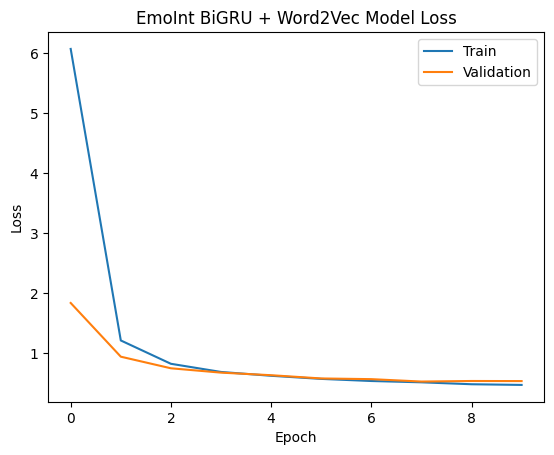

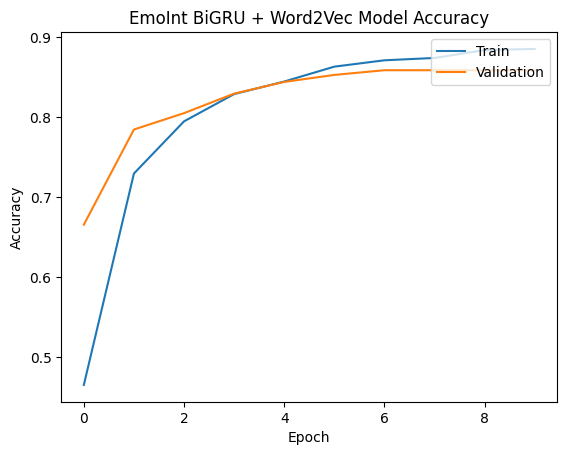

33/33 [==============================] - 1s 21ms/step - loss: 0.5309 - accuracy: 0.8587
Accuracy: 0.859%
Recall Score: 0.859
Precision: 0.871
F1 Score: 0.860
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_78 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_35 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_78 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_78 (Dropout)        (None, 256)               0         
                                                                 
 dense_78 (Dense)          

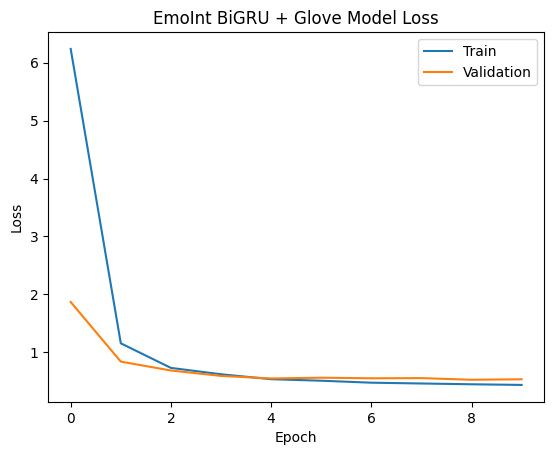

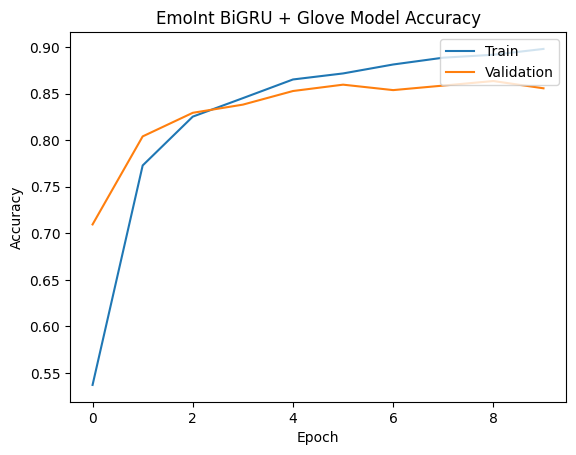

33/33 [==============================] - 1s 17ms/step - loss: 0.5478 - accuracy: 0.8577
Accuracy: 0.858%
Recall Score: 0.858
Precision: 0.861
F1 Score: 0.858
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_79 (Embedding)    (None, 400, 300)          3664500   
                                                                 
 bidirectional_36 (Bidirecti  (None, 400, 256)         330240    
 onal)                                                           
                                                                 
 global_max_pooling1d_79 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_79 (Dropout)        (None, 256)               0         
                                                                 
 dense_79 (Dense)          

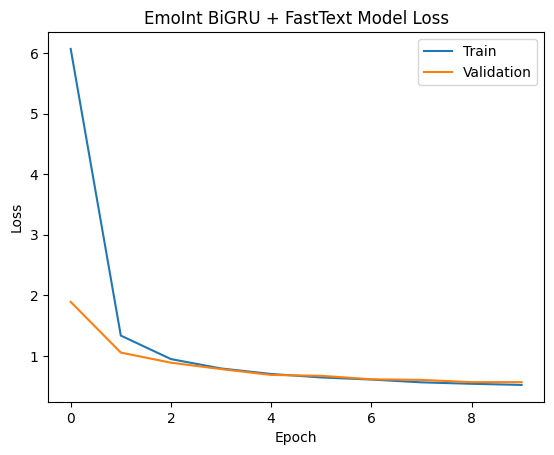

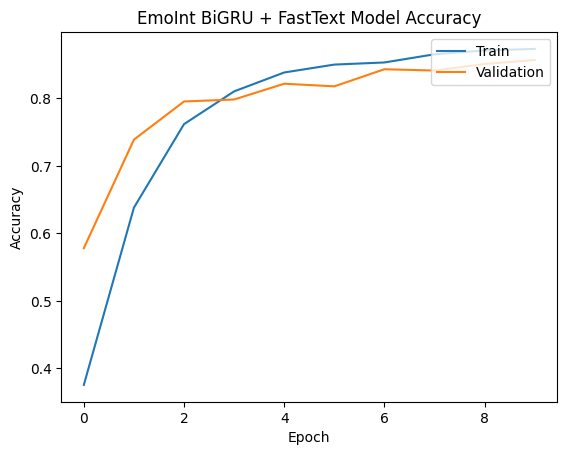

33/33 [==============================] - 1s 20ms/step - loss: 0.5719 - accuracy: 0.8558
Accuracy: 0.856%
Recall Score: 0.856
Precision: 0.859
F1 Score: 0.856


In [150]:
res_isear_bigru_word2vec = test_model("BiGRU", "Word2Vec", "ISEAR")
res_isear_bigru_glove = test_model("BiGRU", "Glove", "ISEAR")
res_isear_bigru_fasttext = test_model("BiGRU", "FastText", "ISEAR")

res_emoint_bigru_word2vec = test_model("BiGRU", "Word2Vec", "EmoInt")
res_emoint_bigru_glove = test_model("BiGRU", "Glove", "EmoInt")
res_emoint_bigru_fasttext = test_model("BiGRU", "FastText", "EmoInt")

In [151]:
import csv
from tabulate import tabulate

model_list = ["LSTM", "BiLSTM", "GRU", "BiGRU"]
embedding_list = ["Word2Vec", "Glove", "FastText"]
performance_list = ["Accuracy", "Recall", "Precision", "F1 Score"]
test_list_isear = [res_isear_lstm_word2vec, res_isear_lstm_glove, res_isear_lstm_fasttext, 
                   res_isear_bilstm_word2vec, res_isear_bilstm_glove, res_isear_bilstm_fasttext, 
                   res_isear_gru_word2vec, res_isear_gru_glove, res_isear_gru_fasttext, 
                   res_isear_bigru_word2vec, res_isear_bigru_glove, res_isear_bigru_fasttext]
test_list_emoint = [res_emoint_lstm_word2vec, res_emoint_lstm_glove, res_emoint_lstm_fasttext, 
                    res_emoint_bilstm_word2vec, res_emoint_bilstm_glove, res_emoint_bilstm_fasttext, 
                    res_emoint_gru_word2vec, res_emoint_gru_glove, res_emoint_gru_fasttext, 
                    res_emoint_bigru_word2vec, res_emoint_bigru_glove, res_emoint_bigru_fasttext]


results_isear = [["Model"] + performance_list]
results_emoint = [["Model"] + performance_list]

for model_key, model in enumerate(model_list):
    for embedding_key, embedding in enumerate(embedding_list):
        row_isear = [f"{model} + {embedding}"]
        row_emoint = [f"{model} + {embedding}"]
        row_isear.extend([round(test_list_isear[model_key * len(embedding_list) + embedding_key][metric], 4) for metric in performance_list])
        row_emoint.extend([round(test_list_emoint[model_key * len(embedding_list) + embedding_key][metric], 4) for metric in performance_list])

        results_isear.append(row_isear)
        results_emoint.append(row_emoint)

table_isear = tabulate(results_isear, headers="firstrow", tablefmt="fancy_grid")
table_emoint = tabulate(results_emoint, headers="firstrow", tablefmt="fancy_grid")


with open("./output/ISEAR_results.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(results_isear)

with open("./output/EmoInt_results.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(results_emoint)

In [152]:
print("ISEAR: ")
print(table_isear)

ISEAR: 
╒═══════════════════╤════════════╤══════════╤═════════════╤════════════╕
│ Model             │   Accuracy │   Recall │   Precision │   F1 Score │
╞═══════════════════╪════════════╪══════════╪═════════════╪════════════╡
│ LSTM + Word2Vec   │     0.5215 │   0.5215 │      0.5148 │     0.5149 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ LSTM + Glove      │     0.5349 │   0.5349 │      0.5322 │     0.5199 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ LSTM + FastText   │     0.4705 │   0.4705 │      0.4663 │     0.4585 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + Word2Vec │     0.5242 │   0.5242 │      0.6012 │     0.509  │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + Glove    │     0.5546 │   0.5546 │      0.5615 │     0.5506 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + FastText │     0.4705 │   0.4705

In [153]:
print("EmoInt: ")
print(table_emoint)

EmoInt: 
╒═══════════════════╤════════════╤══════════╤═════════════╤════════════╕
│ Model             │   Accuracy │   Recall │   Precision │   F1 Score │
╞═══════════════════╪════════════╪══════════╪═════════════╪════════════╡
│ LSTM + Word2Vec   │     0.806  │   0.806  │      0.8141 │     0.8066 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ LSTM + Glove      │     0.8791 │   0.8791 │      0.8801 │     0.8792 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ LSTM + FastText   │     0.7729 │   0.7729 │      0.774  │     0.7725 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + Word2Vec │     0.7515 │   0.7515 │      0.7801 │     0.7511 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + Glove    │     0.8538 │   0.8538 │      0.8579 │     0.8545 │
├───────────────────┼────────────┼──────────┼─────────────┼────────────┤
│ BiLSTM + FastText │     0.6384 │   0.638